## Bem-vindo!

##### Esse projeto visa calcular a capacitância em capacitores de placas paralelas, permitindo a simulação interativa de associações em série e paralelo, com o intuito de analisar a influência da geometria e de materiais dielétricos na capacidade de armazenamento de carga.

**Feito por:** Arthur de Carvalho, Marcel Figueredo e Paulo de Pinho

**Bibliotecas externas usadas:** Numpy, Matplotlib e Ipywidgets

**Constante usada para permissividade do vácuo ($\epsilon_0$):** $8,854 \times 10^{-12}$ F/m

#### Tabela de constantes dielétricas (k) por material:

| Material     | k      |
| ------------ | ------ |
| Vácuo        | 1,0    |
| Ar           | 1,0006 |
| Poliestereno | 2,6    |
| Plástico     | 3,0    |
| Papel        | 4,2    |
| Vidro        | 5,1    |
| Porcelana    | 6,0    |
| Alumina      | 8,5    |

In [10]:
# Importando bibliotecas 
import unicodedata # para normalizar textos (nativa do Python)
import matplotlib.pyplot as plt # para plotar gráficos (biblioteca externa)

# Permissividade do vácuo (Farads por metro)
EPSILON_0 = 8.854e-12

# Dicionário de materiais dielétricos (Constante k)
materiais_dieletricos = {
    'vacuo': 1.0,
    'ar': 1.0006,
    'poliestereno': 2.6,
    'plastico': 3.0,
    'papel': 4.2,
    'vidro': 5.1,
    'porcelana': 6.0,
    'alumina': 8.5
}

# Funções:
def formatar_capacitancia(valor_farads): # Converte Farads para pF, nF ou µF automaticamente para melhor leitura. 
    if valor_farads < 1e-9:
        return f"{valor_farads * 1e12:.2f} pF" # PicoFarads
    elif valor_farads < 1e-6:
        return f"{valor_farads * 1e9:.2f} nF"  # NanoFarads
    else:
        return f"{valor_farads * 1e6:.2f} µF"  # MicroFarads

def ler_valor(mensagem): # Função para auxiliar na leitura de valores float
    return float(input(mensagem).replace(',', '.')) # lê o input do usuário, troca vírgula por ponto (se houver), converte para float e o retorna

def normalizar_texto(texto_irregular): # Função para remover acentos e deixar texto minúsculo
    texto_nfd = unicodedata.normalize('NFD', texto_irregular) # normaliza para NFD (separa acento da letra)
    texto_sem_acentos_binario = texto_nfd.encode('ascii', 'ignore') # converte para ASCII ignorando os caracteres não-ASCII (os acentos)
    texto_sem_acentos = texto_sem_acentos_binario.decode('utf-8') # decodifica de volta para string
    return texto_sem_acentos.lower() # retorna o texto normalizado e minúsculo

def calcular_capacitancia_individual(area_cm2, dist_mm, material): # Calcula a capacitância individual de um capacitor
    # Primeiro converte os dados fornecidos para o SI:
    area_m2 = area_cm2 * 1e-4 # cm² para m²
    dist_m = dist_mm * 1e-3 # mm para m

    # Depois realiza o cálculo:
    k = materiais_dieletricos[material] # Constante Dielétrica com base no nome do material fornecido
    return (k * EPSILON_0 * area_m2) / dist_m # Fórmula: C = (k * E0 * A) / d

In [11]:
# Testes iniciais:
area_cm2 = ler_valor("Informe o valor da área das placas do capacitor (em cm²): ") # lendo area das placas
dist_mm = ler_valor("Informe o valor da distância das placas do capacitor (em mm²): ") # lendo distância entre as placas
material = input("Informe o nome do material, conforme tabela acima: ") # lendo nome do material
material = normalizar_texto(material) # normaliza o nome do material
k = materiais_dieletricos[material] # coleta a constante dielétrica do material, com base no dicionário

capacitancia_individual = calcular_capacitancia_individual(area_cm2, dist_mm, material) # calcula a capacitância individual
print(f"Capacitância individual do capacitor: {formatar_capacitancia(capacitancia_individual)}") # imprime a cpacitância calculada, formatando-a

Capacitância individual do capacitor: 26.56 pF


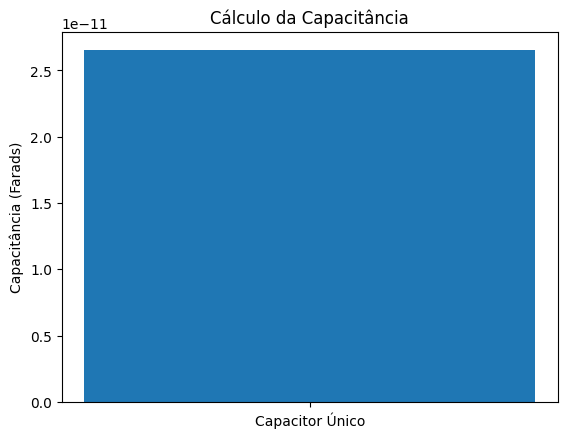

In [12]:
# Testes de gráfico:
nomes_capacitancias = ['Capacitor Único'] # adicionar a capacitância do circuito depois
valores_capacitancias = [capacitancia_individual] # adicionar capacitância equivalente

# plotando o gráfico
plt.bar(nomes_capacitancias, valores_capacitancias, width=0.5) 
plt.title('Cálculo da Capacitância')
plt.ylabel('Capacitância (Farads)')
plt.show()

# adicionar uma opção para mostrar a capacitância formatada em cima das barras